In [77]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [78]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#statsmodule
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# sklearn module
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


from math import sqrt

In [79]:
## reading data
bike_data = pd.read_csv('day.csv')

In [80]:
# Check dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [81]:
#shape of dataset
bike_data.shape

(730, 16)

In [82]:
# info of the dataset
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


we confirm that there are no null values as they match with total count

In [83]:
# data discribe
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


as we see here there are not much difference between mean and median so we can say that there are no outliers

In [84]:
# removing unnecesory columns 
# we can see column dteday and yr month are having same data so we can drop dteday
# we know that combination of casual,registered is cnt which is our target variable so we will not consider casual and registered
bike_data.drop(labels = ['instant', 'dteday', 'casual', 'registered'], axis=1, inplace = True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [85]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [86]:
bike_data.rename(columns = {'yr': 'year', 'mnth': 'month', 'hum': 'humidity', 'cnt': 'count', 'atemp': 'feeling_temp'}, inplace = True)
bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feeling_temp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [87]:
#based on the data we can see how the season,month,weekday,weathersit
bike_data['season'] = bike_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike_data['month'] = bike_data['month'].map({1: 'january', 2: 'february', 3: 'march', 4: 'april', 5:'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})
bike_data['weekday'] = bike_data['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3:  'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
bike_data['weathersit'] = bike_data['weathersit'].map({1: 'clear', 2: 'mist_cloudy', 3: 'light_snow',  4: 'heavy_rain'})
bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feeling_temp,humidity,windspeed,count
0,spring,0,january,0,saturday,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [88]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        730 non-null    object 
 1   year          730 non-null    int64  
 2   month         730 non-null    object 
 3   holiday       730 non-null    int64  
 4   weekday       730 non-null    object 
 5   workingday    730 non-null    int64  
 6   weathersit    730 non-null    object 
 7   temp          730 non-null    float64
 8   feeling_temp  730 non-null    float64
 9   humidity      730 non-null    float64
 10  windspeed     730 non-null    float64
 11  count         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


##Visualising the Data


In [89]:
bike_data.corr()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,count
year,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
feeling_temp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
count,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


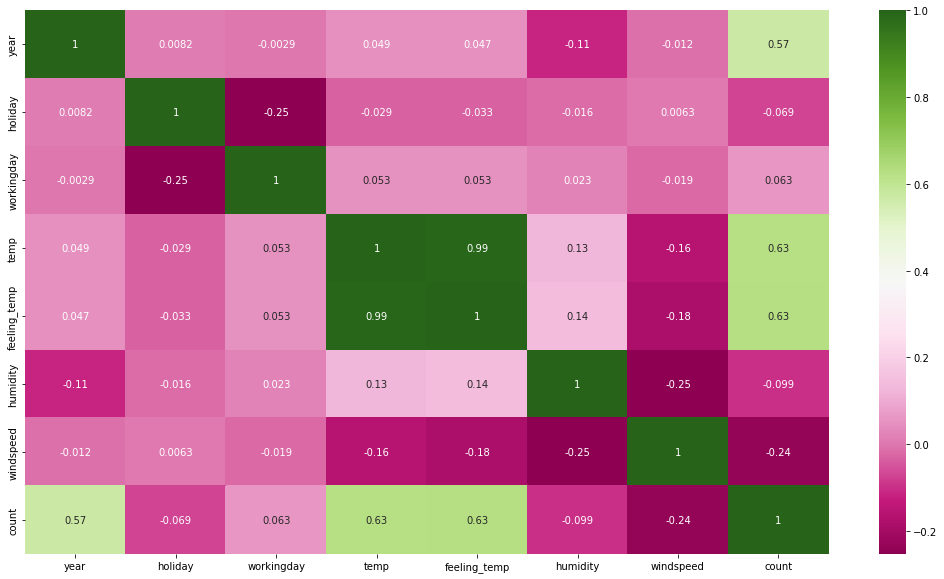

In [90]:
#Heatmap to study correlation of all variables with target variable

plt.figure(figsize = (18, 10))
sns.heatmap(bike_data.corr(), annot = True, cmap='PiYG')
plt.show()

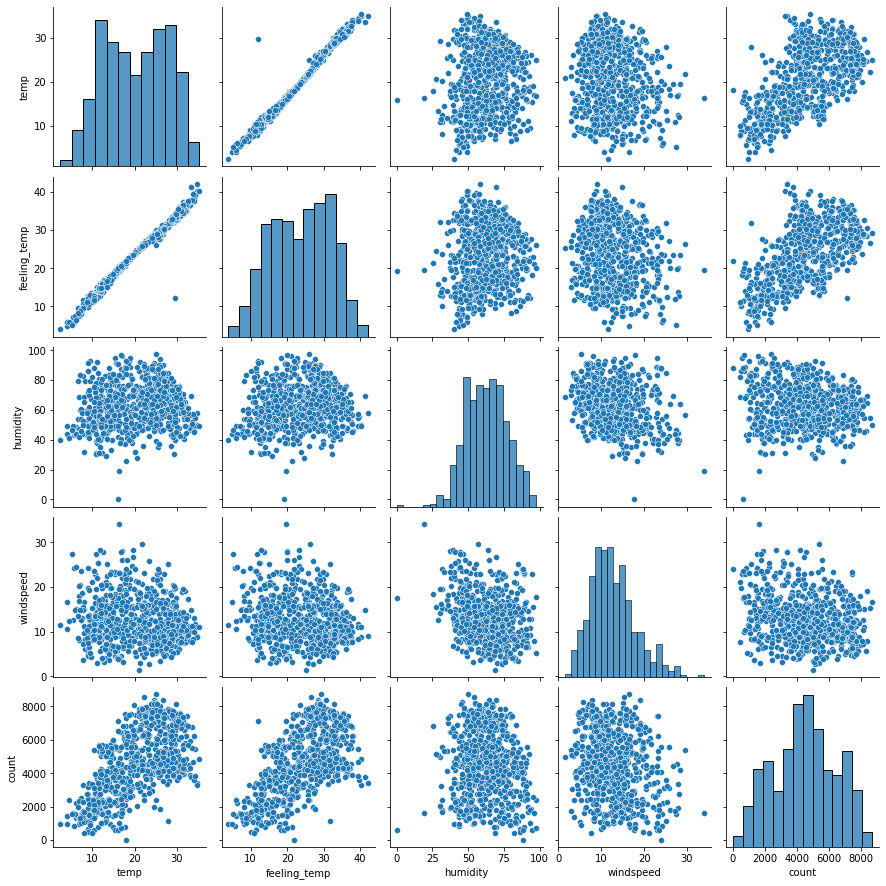

In [91]:
#pair plot on numeric values
sns.pairplot(bike_data, vars=['temp','feeling_temp','humidity','windspeed',"count"])
plt.show()

In [92]:
# the correlation between feeling_temp and temp is 0.99 its almost one so we can drop one
bike_data.drop(['temp'],axis=1,inplace=True)
bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,feeling_temp,humidity,windspeed,count
0,spring,0,january,0,saturday,0,mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,clear,11.46350,43.6957,12.522300,1600


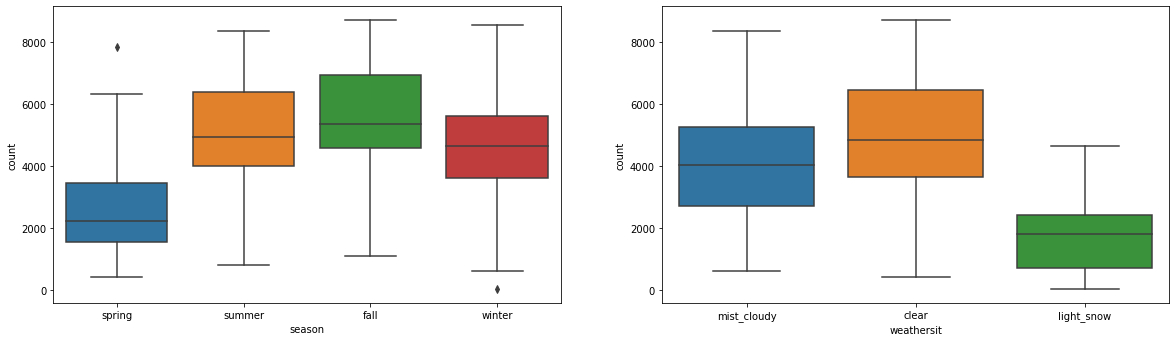

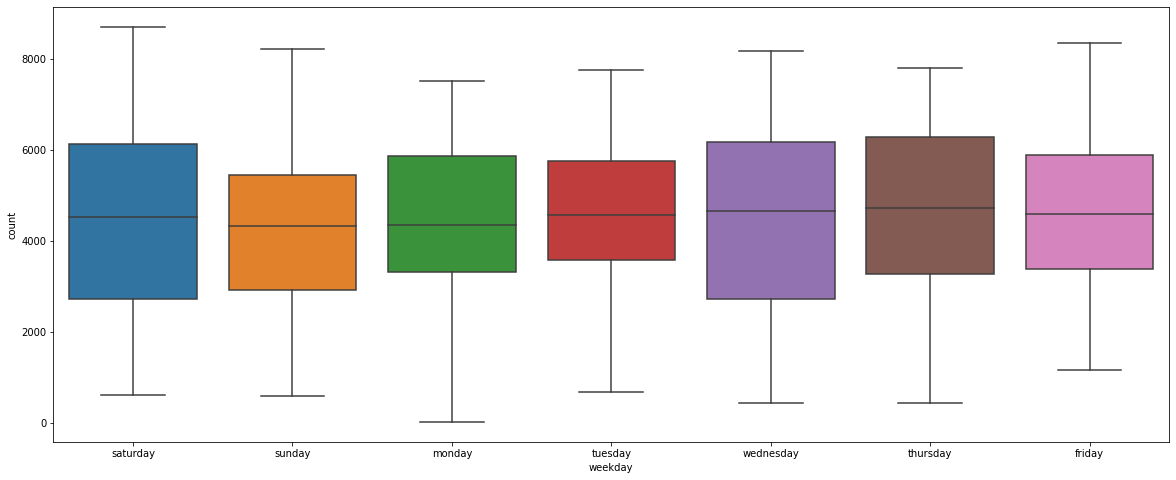

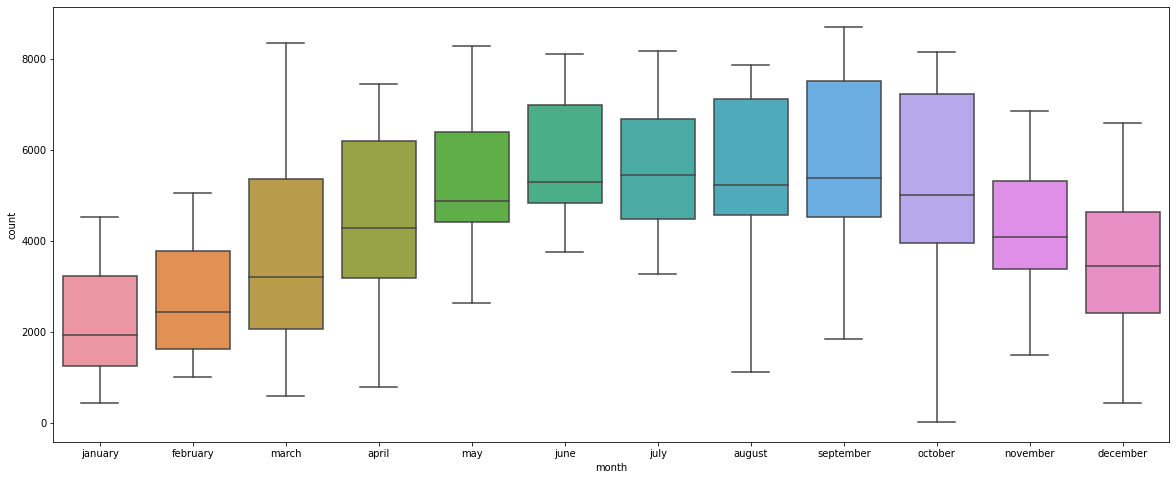

In [93]:
# the catagorical data columns are: season, month,weekday,weathersit
#visualize each of them
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'count', data = bike_data)       
plt.subplot(2,2,2)
sns.boxplot(x = 'weathersit', y = 'count', data = bike_data)   
plt.figure(figsize=(20, 8))
sns.boxplot(x = 'weekday', y = 'count', data = bike_data)      
plt.figure(figsize=(20, 8))
sns.boxplot(x = 'month', y = 'count', data = bike_data)        
plt.show()

Insights:

- median counts are highest in 'fall'

- median counts are highest in 'clear' weather and lowest in 'light_snow'
- median counts are approx. same for all days
high counts in the months of june to september
- the count increased in summer
- the count value is less in holiday time

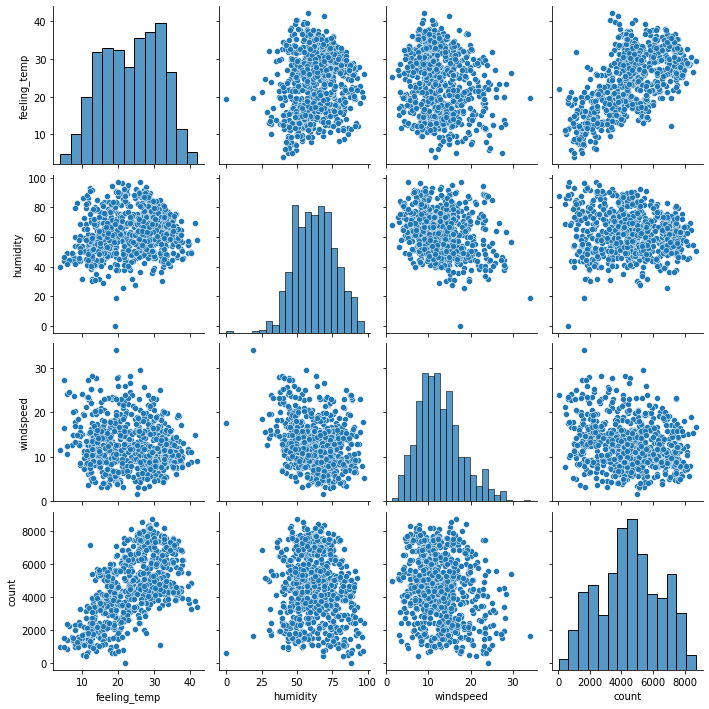

In [94]:
#pair plot on numeric values
sns.pairplot(bike_data, vars=['feeling_temp','humidity','windspeed',"count"])
plt.show()

'feeling_temp' has the highest correlation with target

#dummy variables

In [95]:
season = pd.get_dummies(bike_data['season'], drop_first = True)
month = pd.get_dummies(bike_data['month'], drop_first = True)
weekday = pd.get_dummies(bike_data['weekday'], drop_first = True)
weathersit = pd.get_dummies(bike_data['weathersit'], drop_first = True)

In [96]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [97]:
season.shape

(730, 3)

In [98]:
month.head()

,august,december,february,january,july,june,march,may,november,october,september
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [99]:
month.shape

(730, 11)

In [100]:
weekday.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [101]:
weathersit.head()

,light_snow,mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [102]:
dummy_data = pd.concat([season,month,weekday,weathersit],axis = 1)
dummy_data.head()

,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [103]:
dummy_data.shape

(730, 22)

In [104]:
bike_data.drop(['season', 'month', 'weekday','weathersit'], axis = 1, inplace = True)

In [105]:
bike_data = pd.concat([dummy_data,bike_data],axis = 1)

In [106]:
bike_data.head()

,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy,year,holiday,workingday,feeling_temp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,11.46350,43.6957,12.522300,1600


In [107]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spring        730 non-null    uint8  
 1   summer        730 non-null    uint8  
 2   winter        730 non-null    uint8  
 3   august        730 non-null    uint8  
 4   december      730 non-null    uint8  
 5   february      730 non-null    uint8  
 6   january       730 non-null    uint8  
 7   july          730 non-null    uint8  
 8   june          730 non-null    uint8  
 9   march         730 non-null    uint8  
 10  may           730 non-null    uint8  
 11  november      730 non-null    uint8  
 12  october       730 non-null    uint8  
 13  september     730 non-null    uint8  
 14  monday        730 non-null    uint8  
 15  saturday      730 non-null    uint8  
 16  sunday        730 non-null    uint8  
 17  thursday      730 non-null    uint8  
 18  tuesday       730 non-null    

#**Splitting the Data**

In [108]:
bike_train, bike_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [109]:
bike_train.head()

,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy,year,holiday,workingday,feeling_temp,humidity,windspeed,count
653,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,23.0423,55.8333,12.208807,7534
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,33.1448,70.4167,11.083475,7216
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,20.6746,62.1250,10.792293,4066
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,11.5850,48.3333,23.500518,1796
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,18.8752,48.9583,8.708325,4220


In [110]:
bike_test.head()

,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy,year,holiday,workingday,feeling_temp,humidity,windspeed,count
184,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,33.27085,63.7917,5.459106,6043
535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,36.04875,59.2083,7.625404,6211
299,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,22.85230,81.2917,13.250121,2659
221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,34.24915,42.4167,13.417286,4780
152,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,32.19710,30.5000,19.583229,4968


In [111]:
#scaling the numerical values using MinMaxScaler
scaler=MinMaxScaler()

In [112]:
#
bike_train[['feeling_temp', 'humidity', 'windspeed','count']] = scaler.fit_transform(bike_train[['feeling_temp', 'humidity', 'windspeed','count']])#
bike_train.head()

,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy,year,holiday,workingday,feeling_temp,humidity,windspeed,count
653,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0.391735,0.504508,0.188475,0.482973


In [113]:
bike_train.describe()

,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy,year,holiday,workingday,feeling_temp,humidity,windspeed,count
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
y_train = bike_train.pop('count')
X_train = bike_train

In [115]:
X_train.head()

,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy,year,holiday,workingday,feeling_temp,humidity,windspeed
653,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0.391735,0.504508,0.188475


In [116]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

#**Building a model**

In [117]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe =  RFE(lm, n_features_to_select =15)
rfe = rfe.fit(X_train, y_train)

In [118]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('august', True, 1),
 ('december', True, 1),
 ('february', True, 1),
 ('january', True, 1),
 ('july', False, 9),
 ('june', False, 7),
 ('march', False, 14),
 ('may', False, 6),
 ('november', True, 1),
 ('october', False, 13),
 ('september', True, 1),
 ('monday', False, 8),
 ('saturday', False, 2),
 ('sunday', False, 4),
 ('thursday', False, 11),
 ('tuesday', False, 10),
 ('wednesday', False, 12),
 ('light_snow', True, 1),
 ('mist_cloudy', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('feeling_temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [119]:
col = X_train.columns[rfe.support_]
col

Index(['summer', 'winter', 'august', 'december', 'february', 'january',
       'november', 'september', 'light_snow', 'mist_cloudy', 'year', 'holiday',
       'feeling_temp', 'humidity', 'windspeed'],
      dtype='object')

In [120]:
X_train.columns[~rfe.support_]

Index(['spring', 'july', 'june', 'march', 'may', 'october', 'monday',
       'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday', 'workingday'],
      dtype='object')

In [121]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,summer,winter,august,december,february,january,november,september,light_snow,mist_cloudy,year,holiday,feeling_temp,humidity,windspeed
653,0,1,0,0,0,0,0,0,0,0,1,0,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,0,0,0,1,0,0.766351,0.725633,0.264686
426,0,0,0,0,0,0,0,0,0,1,1,0,0.438975,0.640189,0.255342
728,0,0,0,1,0,0,0,0,0,0,1,0,0.200348,0.498067,0.663106
482,1,0,0,0,0,0,0,0,0,1,1,0,0.391735,0.504508,0.188475


#using stas model

In [122]:
X_train_lm = sm.add_constant(X_train_rfe)   
lr = sm.OLS(y_train, X_train_lm).fit()     
print(lr.summary())  

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.26e-186
Time:                        13:55:29   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2936      0.032      9.289   

all p values are <0.05

#vfi

In [123]:
def vfi_check(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [124]:
X = X_train_rfe
vif = vfi_check(X)
vif

,Features,VIF
13,humidity,25.11
12,feeling_temp,14.42
14,windspeed,3.89
1,winter,3.04
0,summer,2.28
9,mist_cloudy,2.24
10,year,2.06
5,january,1.92
6,november,1.85
3,december,1.63


We want a VIF that is less than 5. So we can drop those which have more than 5

In [125]:
def remove_rebuild_model(X,field):
  X = X.drop(field, 1)
  X_train_lm = sm.add_constant(X)
  lr = sm.OLS(y_train, X_train_lm).fit()
  return X,lr
  



In [126]:
X,lr1=remove_rebuild_model(X,'humidity')
print(lr1.summary())  

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          7.00e-184
Time:                        13:55:29   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2114      0.026      8.281   

In [127]:
vif = vfi_check(X)
vif

,Features,VIF
12,feeling_temp,4.99
13,windspeed,3.83
1,winter,2.62
10,year,2.06
0,summer,2.04
6,november,1.81
2,august,1.59
9,mist_cloudy,1.57
3,december,1.41
7,september,1.35


In [128]:
X,lr2=remove_rebuild_model(X,'november')
print(lr2.summary())  

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.59e-184
Time:                        13:55:29   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -965.2
Df Residuals:                     496   BIC:                            -905.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1967      0.025      7.928   

In [129]:
vif = vfi_check(X)
vif

,Features,VIF
11,feeling_temp,4.96
12,windspeed,3.75
9,year,2.06
0,summer,2.04
1,winter,1.79
2,august,1.59
8,mist_cloudy,1.57
6,september,1.33
5,january,1.28
4,february,1.26


In [130]:
X,lr3=remove_rebuild_model(X,'february')
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.22e-184
Time:                        13:55:29   Log-Likelihood:                 494.08
No. Observations:                 510   AIC:                            -962.2
Df Residuals:                     497   BIC:                            -907.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1671      0.021      7.949   

In [131]:
vif = vfi_check(X)
vif

,Features,VIF
10,feeling_temp,4.95
11,windspeed,3.30
8,year,2.04
0,summer,1.91
1,winter,1.71
2,august,1.56
7,mist_cloudy,1.54
5,september,1.32
3,december,1.23
4,january,1.23


In [132]:
X,lr4=remove_rebuild_model(X,'december')
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.91e-184
Time:                        13:55:29   Log-Likelihood:                 492.31
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     498   BIC:                            -909.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1550      0.020      7.734   

In [133]:
vif = vfi_check(X)
vif

,Features,VIF
9,feeling_temp,4.95
10,windspeed,3.27
7,year,2.04
0,summer,1.90
1,winter,1.57
2,august,1.56
6,mist_cloudy,1.54
4,september,1.31
3,january,1.22
5,light_snow,1.08


In [134]:
lr4.params

const           0.154976
summer          0.090112
winter          0.120615
august          0.064922
january        -0.046296
september       0.117648
light_snow     -0.279052
mist_cloudy    -0.082446
year            0.234335
holiday        -0.093118
feeling_temp    0.506865
windspeed      -0.141033
dtype: float64

In [135]:
X_train_lm = sm.add_constant(X)

##Residual Analysis of the train data

In [136]:

y_train_lm = lr4.predict(X_train_lm)

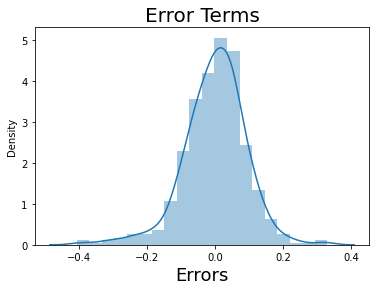

In [137]:
fig = plt.figure()
sns.distplot((y_train - y_train_lm), bins = 20)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  
plt.show()

In [138]:
X_train_lm.shape

(510, 12)

In [139]:
X_train_lm.columns

Index(['const', 'summer', 'winter', 'august', 'january', 'september',
       'light_snow', 'mist_cloudy', 'year', 'holiday', 'feeling_temp',
       'windspeed'],
      dtype='object')

###prediction

In [140]:
concol = ['feeling_temp', 'humidity', 'windspeed','count']
bike_test[concol] = scaler.transform(bike_test[concol])
bike_test.head()

,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy,year,holiday,workingday,feeling_temp,humidity,windspeed,count
184,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.769660,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.842587,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0.496145,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.795343,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.741471,0.314298,0.537414,0.569029


In [141]:
bike_test.describe()

,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy,year,holiday,workingday,feeling_temp,humidity,windspeed,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300


###test

In [142]:
y_test = bike_test.pop('count')
X_test = bike_test

In [143]:
X_test_lm = sm.add_constant(X_test)
X_test_lm = X_test_lm[['const', 'summer', 'winter', 'august', 'january', 'september',
       'light_snow', 'mist_cloudy', 'year', 'holiday', 'feeling_temp',
       'windspeed']]#['const','summer','winter','august','september','light_snow','mist_cloudy','year','holiday','feeling_temp','windspeed']]

In [144]:
X_test_lm.head()

,const,summer,winter,august,january,september,light_snow,mist_cloudy,year,holiday,feeling_temp,windspeed
184,1.0,0,0,0,0,0,0,1,0,1,0.769660,0.084219
535,1.0,1,0,0,0,0,0,0,1,0,0.842587,0.153728
299,1.0,0,1,0,0,0,0,1,0,0,0.496145,0.334206
221,1.0,0,0,1,0,0,0,0,0,0,0.795343,0.339570
152,1.0,1,0,0,0,0,0,0,0,0,0.741471,0.537414


In [145]:
y_test_pred_lm = lr4.predict(X_test_lm)

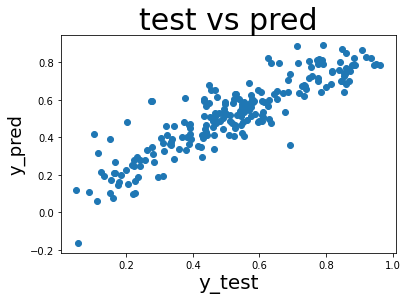

In [146]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred_lm)
plt.title('test vs pred', fontsize = 30)
plt.xlabel('y_test', fontsize = 20)          # X-label
plt.ylabel('y_pred', fontsize = 18)          # Y-label
plt.show()

In [147]:
np.sqrt(mean_squared_error(y_test, y_test_pred_lm))

0.09962585401104616

In [148]:
r2_score(y_test, y_pred_lm)

0.791027646986757

In [149]:
test_r2_score = 100*r2_score(y_true=y_test, y_pred=y_test_pred_lm)
train_r2_score = 100*r2_score(y_true=y_train, y_pred=y_train_lm)
diffr = train_r2_score - test_r2_score

print('Test R2 Score: ', round(test_r2_score, 2))
print('Train R2 Score: ', round(train_r2_score, 2))
print('Differnce between Train and Test R2 Scores: ', round(diffr, 2), '%')


Test R2 Score:  79.1
Train R2 Score:  83.13
Differnce between Train and Test R2 Scores:  4.03 %


In [150]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.91e-184
Time:                        13:55:30   Log-Likelihood:                 492.31
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     498   BIC:                            -909.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1550      0.020      7.734   

we can see the equation of the line 
cnt = 0.1550*const+0.0901*summer+0.1206*winter+0.0649*august-0.0463*january+0.1176*september-0.2791*light_snow-0.0824*mist_cloudy+0.2343*year-0.0931*holiday+0.5069*feeling_temp-0.1410*windspeed       
